In [1]:
import pandas as pd
import quandl, math, datetime
import numpy as np
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

In [23]:
style.use("ggplot")
plt.rcParams['figure.figsize'] = [20, 20]

In [3]:
#df =quandl.get("WIKI/GOOGL")
#df.to_csv("Google_Stocks.csv")
df = pd.read_csv("Google_Stocks.csv", index_col="Date")
df

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,1092.57,1108.70,1087.21,1094.000,1990515.0,0.0,1.0,1092.570000,1108.700000,1087.210000,1094.000000,1990515.0
2018-03-22,1080.01,1083.92,1049.64,1053.150,3418154.0,0.0,1.0,1080.010000,1083.920000,1049.640000,1053.150000,3418154.0
2018-03-23,1051.37,1066.78,1024.87,1026.550,2413517.0,0.0,1.0,1051.370000,1066.780000,1024.870000,1026.550000,2413517.0


In [4]:
col = df.columns

In [5]:
df.drop(columns=col[0:7], inplace= True)
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0


In [6]:
df["HL_PCT"]=(df["Adj. High"]-df["Adj. Close"])/df["Adj. Close"]*100.0
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HL_PCT
Date,,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0,3.712563
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0,0.710922
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0,3.729433
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0,6.417469
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0,1.886792


In [7]:
df["PCT_change"]=(df["Adj. Close"]-df["Adj. Open"])/df["Adj. Open"]*100.0
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HL_PCT,PCT_change
Date,,,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0,3.712563,0.324968
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0,0.710922,7.227007
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0,3.729433,-1.227880
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0,6.417469,-5.726357
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0,1.886792,1.183658


In [8]:
df.drop(columns=["Adj. Open","Adj. High","Adj. Low"],inplace=True)
df.head()

,Adj. Close,Adj. Volume,HL_PCT,PCT_change
Date,,,,
2004-08-19,50.322842,44659000.0,3.712563,0.324968
2004-08-20,54.322689,22834300.0,0.710922,7.227007
2004-08-23,54.869377,18256100.0,3.729433,-1.227880
2004-08-24,52.597363,15247300.0,6.417469,-5.726357
2004-08-25,53.164113,9188600.0,1.886792,1.183658


In [9]:
forecast_col = "Adj. Close"
df.fillna(-999999,inplace=True) #replace NaN with outliers

In [10]:
forecast_out = int(math.ceil(0.01*len(df)))
print(forecast_out)

35


In [11]:
df["label"] = df[forecast_col].shift(-forecast_out) #label column is Adj. Close shifted up by 35 days
df.tail()

,Adj. Close,Adj. Volume,HL_PCT,PCT_change,label
Date,,,,,
2018-03-21,1094.00,1990515.0,1.343693,0.130884,NaN
2018-03-22,1053.15,3418154.0,2.921711,-2.487014,NaN
2018-03-23,1026.55,2413517.0,3.918952,-2.360729,NaN
2018-03-26,1054.09,3272409.0,0.491419,0.332191,NaN
2018-03-27,1006.94,2940957.0,5.720301,-5.353887,NaN


In [12]:
X=np.array(df.drop(columns='label'))       #no.of examples*no.of features
X = preprocessing.scale(X)                 #feature scaling
X_predict = X[-forecast_out:]              #these feature values will be used to predict 35 days in future
print(X_predict.shape)
X = X[:-forecast_out]                      #for training and testing
print(X.shape)

(35, 4)
(3389, 4)


In [13]:
df.dropna(inplace=True) #drops the last 35 rows from df
y=np.array(df["label"]) #no.of examples*1
print(y.shape)

(3389,)


In [14]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2) #shuffle and split

In [15]:
clf = LinearRegression(n_jobs=-1) #n_jobs=-1 =>use all processing power for other values it represents parallel threads

In [16]:
#clf.fit(X_train,y_train)
#with open("linearregression.pickle","wb") as f:
    #pickle.dump(clf,f)
pickle_in = open("linearregression.pickle","rb")
clf = pickle.load(pickle_in)

In [17]:
accuracy = clf.score(X_test,y_test)
print(accuracy) 

0.9784835060124002


In [18]:
forecast_set = clf.predict(X_predict)
print(forecast_set)

[1101.99546701 1071.46985117 1017.32493131 1060.70587793 1072.70866015
 1073.04868236 1091.81772567 1111.07778698 1113.91394395 1121.92122392
 1130.86289596 1128.60511549 1148.53481241 1164.1894187  1134.98564953
 1121.32666457 1086.54951212 1102.9593866  1113.79402126 1120.90477455
 1134.82025498 1149.50011941 1181.05523555 1185.14040556 1156.1947011
 1168.07920177 1169.86253341 1152.37602554 1117.87194412 1114.5933633
 1112.13680944 1068.88210133 1040.70919429 1072.79039842 1018.92697738]


In [19]:
df["Forecast"] = np.nan

In [20]:
last_date = df.iloc[-1].name
last_unix = datetime.datetime.strptime(last_date,"%Y-%m-%d").timestamp()
one_day = 86400
next_unix = last_unix+one_day

In [21]:
%matplotlib inline

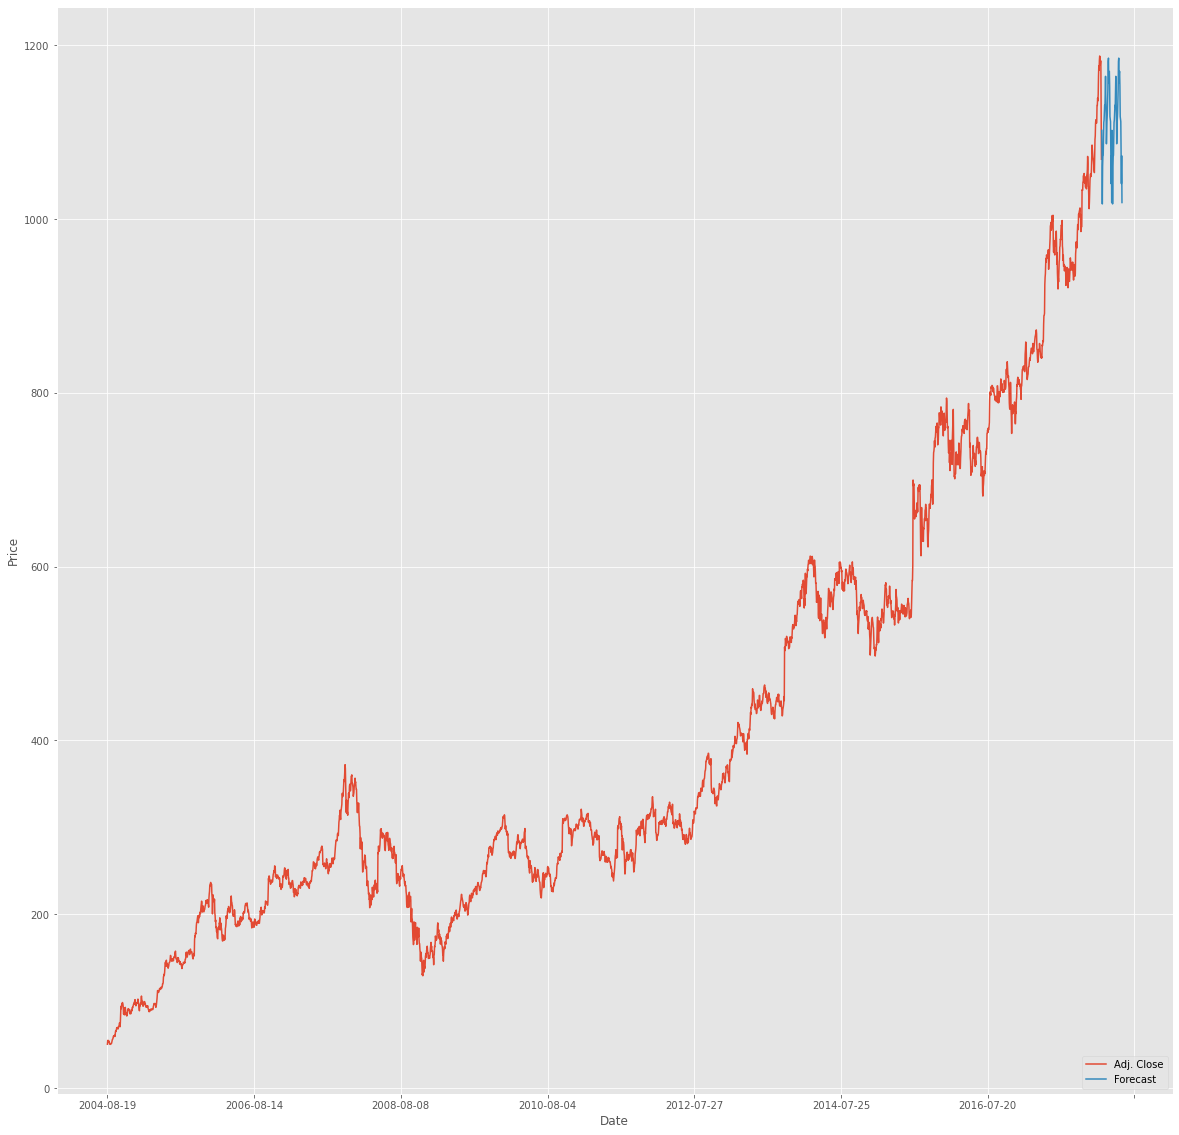

In [24]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix+=one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
    
df["Adj. Close"].plot()
df["Forecast"].plot()
plt.legend(loc = 4) #legend in 4th quadrant
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()